In [2]:
# OUTLIER ANALYSIS

In [3]:
#boxplot method is one the most common method.Variables are ordered ascending.

In [4]:
#Threshhold value is calculated on the basis of quantiles(Q1,Q3)

In [5]:
#And outliers are defined by calculated threshold

# Let's give an example:::::::::::

In [7]:
import seaborn as sns
df=sns.load_dataset("diamonds")
df=df.select_dtypes(include=["float64","int64"]) #to access numerical values only
df=df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [8]:
df_table=df["table"]
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

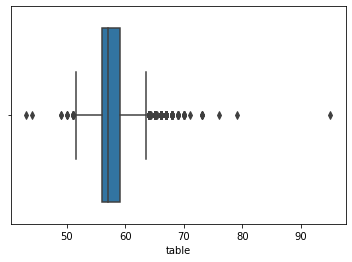

In [9]:
sns.boxplot(x=df_table);

In [10]:
Q1=df_table.quantile(0.25)
Q3=df_table.quantile(0.75) #these all calculation is made to determine threshold.We ll see in following lines
IQR=Q3-Q1 

In [11]:
lower_limit=Q1-1.5*IQR

In [12]:
upper_limit=Q3+1.5*IQR

In [13]:
print(lower_limit,upper_limit)

51.5 63.5


In [14]:
df_table<lower_limit #will declared numbers of lower than the lower limit by truefalse

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [15]:
upper_limit<df_table #will declared numbers of upper than the upper limit by truefalse

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [16]:
#this two declaration help us to detect outliers.True values are outliers cuz they exceed the threshold

In [17]:
outliers=(df_table<lower_limit) | (upper_limit<df_table) #total detection of outliers is defined with true

In [18]:
df_table[outliers]#we determined outliers but we should detect the indexes of its

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [19]:
df_table[outliers].index

Int64Index([    2,    91,   145,   219,   227,   239,   296,   314,   356,
              359,
            ...
            53226, 53503, 53542, 53577, 53660, 53695, 53697, 53756, 53757,
            53785],
           dtype='int64', length=605)

In [20]:
#we have determined the outliers but we haven't solved the problem so:

In [21]:
#SOLVING OUTLIER PROBLEM

In [22]:
#deleting

In [23]:
import pandas as pd
type(df_table)

pandas.core.series.Series

In [24]:
df_table=pd.DataFrame(df_table) #we should convert Seriestype to PandasDataFrame

In [25]:
df_table.shape #(observation value,dimension)

(53940, 1)

In [26]:
t_df=df_table[~((df_table<lower_limit) | (upper_limit<df_table)).any(axis=1)]# we used ~ to reverse the logic.

In [27]:
#we also used .any(axis=1)to chose columns

In [28]:
t_df.shape #we deleted the outliers.We can make inferences from the line 46.There was 605 outliers.We can also check from the line 57 

(53335, 1)

In [29]:
df_table[outliers].shape

(605, 1)

In [30]:
#FILLING WITH THE AVERAGE VALUE

In [31]:
import seaborn as sns
df=sns.load_dataset("diamonds")
df=df.select_dtypes(include=["float64","int64"])
df=df.dropna()
#we did the same thing to have numerical values only
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [32]:
df_table=df["table"] 

In [33]:
#we already have the outliers from the previous lines so let's call it

In [34]:
df_table[outliers]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [35]:
df_table.mean() #determined the mean value.Let's assigned this value to the outliers

57.45718390804603

In [36]:
df_table[outliers]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [37]:
df_table[outliers] = df_table.mean() #we assigned mean values to outliers

<ipython-input-37-7b8930c56bb9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[outliers] = df_table.mean() #we assigned average values to the outliers


In [38]:
df_table[outliers]#we can compare with 164th line and can get that outliers is modified

2        57.457184
91       57.457184
145      57.457184
219      57.457184
227      57.457184
           ...    
53695    57.457184
53697    57.457184
53756    57.457184
53757    57.457184
53785    57.457184
Name: table, Length: 605, dtype: float64

In [39]:
#SUPPRESSION METHOD 

In [40]:
import seaborn as sns
df=sns.load_dataset("diamonds")
df=df.select_dtypes(include=(["float64","int64"]))
df=df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [41]:
df_table=df["table"]

In [42]:
#let's remember to determine the threshold

In [43]:
Q1=df_table.quantile(0.25)
Q3=df_table.quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3 + 1.5*IQR
lower_outliers=df_table<lower_limit
upper_outliers=upper_limit<df_table

In [44]:
df_table[lower_outliers] 

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [45]:
#if we want to surpress values,we should surpess lower_outliers to lower_limit and upper_outliers to upper limt

In [46]:
df_table[lower_outliers]=lower_limit
df_table[lower_outliers] #shouldn't be worried about the error

<ipython-input-46-d8b202959308>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[lower_outliers]=lower_limit


1515     51.5
3238     51.5
3979     51.5
4150     51.5
5979     51.5
7418     51.5
8853     51.5
11368    51.5
22701    51.5
25179    51.5
26387    51.5
33586    51.5
35633    51.5
45798    51.5
46040    51.5
47630    51.5
Name: table, dtype: float64

In [47]:
#####################

In [48]:
#MULTI VARIABLE OUTLIER OBSERVATION METHOD

In [49]:
# it allows us to define possible outliers by scoring the observations based on density at their locations.
#A point of local density is compared with neighbors.If the density of point is definitively low,
#we can determine that there is something going on with neighbors and it points that it is an outlier#

In [50]:
import seaborn as sns
diamonds=sns.load_dataset("diamonds")
diamonds=diamonds.select_dtypes(include=["float64","int64"])
df=diamonds.copy() 
df=df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [51]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
clf=LocalOutlierFactor(n_neighbors=20,contamination=0.1) #contain fromative features

In [52]:
clf.fit_predict(df) #operation of working the algorithm

array([-1, -1, -1, ...,  1,  1,  1])

In [53]:
df_scores=clf.negative_outlier_factor_ 

In [54]:
np.sort(df_scores)[0:20]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387,
       -4.0566648 , -4.01831733, -3.94882806, -3.82378797, -3.80135297,
       -3.75680919, -3.65947378, -3.59249261, -3.55564138, -3.47157375])

In [55]:
threshold=np.sort(df_scores)[13] #we just decided to take 13th index form our observation

In [56]:
not_outlier=threshold<df_scores
not_outlier

array([ True,  True,  True, ...,  True,  True,  True])

In [57]:
# we determined our nonoutlier elements

In [58]:
#deleting method

In [59]:
new_df=df[not_outlier] # we assigned our nonoutlier as a new dataframe so we deleted the outliers
new_df                 # it is a nonoutlier dataframa because it is bigger than density threshold 

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [60]:
# Surpressing Method

In [61]:
new_outliers=df[df_scores<threshold]

In [62]:
threshold_data=df[df_scores==threshold]

In [63]:
threshold_data  # we already decided our outlier data but we wanted mention it bcz outliers will be surpressed by it

,carat,depth,table,price,x,y,z
31230,0.45,68.6,57.0,756,4.73,4.5,3.19


In [64]:
new_outliers.to_records(index=False) #we convert it to a numpy array so we are free to operate with indexes

rec.array([(1.  , 44. , 53. ,  4032, 6.31,  6.24,  4.12),
           (1.09, 43. , 54. ,  4778, 6.53,  6.55,  4.12),
           (2.  , 58.9, 57. , 12210, 8.09, 58.9 ,  8.06),
           (0.29, 62.8, 44. ,   474, 4.2 ,  4.24,  2.65),
           (0.3 , 51. , 67. ,   945, 4.67,  4.62,  2.37),
           (0.73, 70.8, 55. ,  1049, 5.51,  5.34,  3.84),
           (1.03, 78.2, 54. ,  1262, 5.72,  5.59,  4.42),
           (0.7 , 71.6, 55. ,  1696, 5.47,  5.28,  3.85),
           (0.51, 61.8, 54.7,  1970, 5.12,  5.15, 31.8 ),
           (0.51, 61.8, 55. ,  2075, 5.15, 31.8 ,  5.12),
           (0.81, 68.8, 79. ,  2301, 5.26,  5.2 ,  3.58),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [65]:
res=new_outliers.to_records(index=False) # we just named

In [66]:
res[:]=threshold_data.to_records(index=False) # we assigned threshold_data value to all res indexes so........
res

rec.array([(0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [67]:
#so we changed outliers to surpressing value but we didn't save them in the new_df which means nonoutliers list 

In [68]:
# first of all we should change numpy array to dataframe.Let's do it then

In [69]:
import pandas as pd
new_outliers

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


In [70]:
new_outliers=pd.DataFrame(res,index=new_outliers.index) # we have to do the index thing otherwise indexes wouldn't be matched

In [71]:
new_outliers

,carat,depth,table,price,x,y,z
6341,0.45,68.6,57.0,756,4.73,4.5,3.19
10377,0.45,68.6,57.0,756,4.73,4.5,3.19
24067,0.45,68.6,57.0,756,4.73,4.5,3.19
35633,0.45,68.6,57.0,756,4.73,4.5,3.19
36503,0.45,68.6,57.0,756,4.73,4.5,3.19
38840,0.45,68.6,57.0,756,4.73,4.5,3.19
41918,0.45,68.6,57.0,756,4.73,4.5,3.19
45688,0.45,68.6,57.0,756,4.73,4.5,3.19
48410,0.45,68.6,57.0,756,4.73,4.5,3.19
49189,0.45,68.6,57.0,756,4.73,4.5,3.19


In [72]:
###########

In [73]:
# MISSING DATA ANALYSIZ

In [74]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3})
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [83]:
df.isnull() #showed NaN as True and False

,V1,V2,V3
0,False,False,True
1,False,True,False
2,False,False,False
3,True,False,False
4,False,False,False
5,False,True,False
6,True,True,True
7,False,False,False
8,False,False,False


In [76]:
df.isnull().sum() # we counted the NaN values

V1    2
V2    3
V3    2
dtype: int64

In [77]:
df.isnull().sum().sum() # we also counted the all NaN values

7

In [79]:
df[df.isnull().any(axis = 1)] # we called the columns if they have any missing value so just came few

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


In [82]:
df[df.notnull().all(axis=1)] # show me the columns that they don't have any NaN

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [86]:
df[df["V1"].notnull() & df["V2"].notnull() & df["V3"].notnull()] # so we just did the same thing like the column above this line

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [87]:
df[df["V1"].notnull()] #called present V1 values only

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [88]:
# deleting the missing values

In [89]:
df.dropna() # temporary deleting if we equalize with some variable like c= it will be permanent

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [90]:
# basic value assignment

In [91]:
df["V1"].mean() #finding mean value of the column V1

6.0

In [93]:
df["V1"].fillna(df["V1"].mean()) # we "filled" the missing values with the mean ***fillna***

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [95]:
df["V2"].fillna(0) # we "fill" NaN values by zero

0     7.0
1     0.0
2     5.0
3     8.0
4    12.0
5     0.0
6     0.0
7     2.0
8     3.0
Name: V2, dtype: float64

In [99]:
df.apply(lambda x: x.fillna(x.mean()), axis=0) # shortcut of filling missing values with the mean

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [101]:
# some reminders

In [104]:
# number of integers in variables
df.notnull().sum

,V1,V2,V3
0,True,True,False
1,True,False,True
2,True,True,True
3,False,True,True
4,True,True,True
5,True,False,True
6,False,False,False
7,True,True,True
8,True,True,True


In [105]:
# number of missing values in variables
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

In [107]:
# minimum one missing observations
df[df.isnull().any(axis=1)]

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


In [108]:
# which has just present observations
df[df.notnull().all(axis=1)]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0
